# Import the basic package

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

In [7]:
# read in the data that we clean with data_cleaning.ipynb
data = pd.read_csv("/Users/KVTran/Documents/Research/WPI/Slip_Buddy/REU_2017/data/questions_adjusted.csv")
#data = pd.read_csv("/Users/KVTran/Documents/Research/WPI/Slip_Buddy/REU_2017/data/Individual_Patient/patientID_10.csv")
# check for NaN value. 
if not (data.isnull().values.any()):
    print("There is no NaN values in the dataframe.")
#assess the dataframe
print("the dimenstion of the data is " + str(data.shape))
print("The date type is " + str(type(data)))
print(list(data.columns))
#data.describe()

There is no NaN values in the dataframe.
the dimenstion of the data is (540, 21)
The date type is <class 'pandas.core.frame.DataFrame'>
['Unnamed: 0', 'DAY', 'patientid', 'date', 'Gender', 'Age', 'Marital Status', 'Education (Numeric)', 'Household', 'Income', 'AM Stress', 'AM Hunger', 'AM Sleep', 'AM Sleep hours', 'AM Weight', 'Percent Weight change (from prev week)', 'Percent Weight change (from prev day)', 'PM Stress', 'EVE Stress', 'Number of Episodes Previous Day', 'Episode']


In [8]:
# At the moment, the inmation from race is not particularly helpful. We only have 3 races: Caucasian, Black and Asian.
# Hence, for the purpose of building a predictive model, races will not ibe included

Predictor_Cols = ['Gender', 'Age', 
                  'Marital Status', 'Education (Numeric)', 'Household', 'Income', 
                  'AM Stress', 'AM Hunger', 'AM Sleep', 'AM Sleep hours', 
                  'Percent Weight change (from prev week)', 'Percent Weight change (from prev day)',
                  'PM Stress', 'EVE Stress', 'Number of Episodes Previous Day']
Target_Col = ['Episode']

predictors = data[Predictor_Cols]
target = data[Target_Col]

((324, 15), (216, 15))
((324, 1), (216, 1))


[[121  25]
 [ 54  16]]


0.634259259259


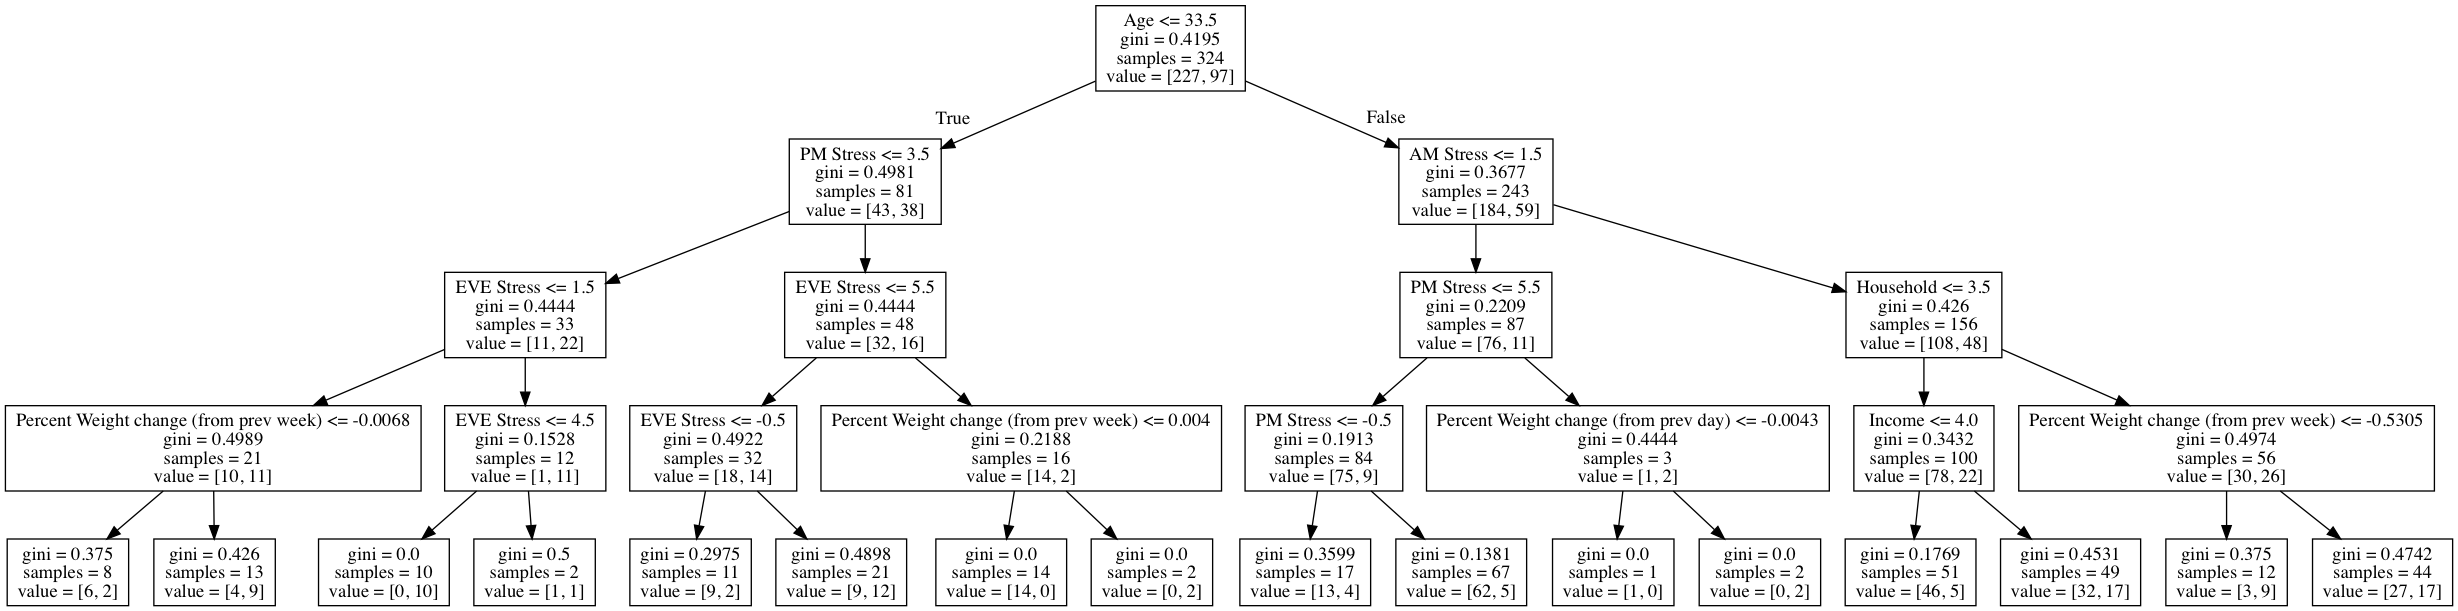

In [9]:
# build the decision tree model
from sklearn.cross_validation import train_test_split
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, target, test_size = 0.4)
print(pred_train.shape, pred_test.shape)
print(tar_train.shape, tar_test.shape)

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth=4)
classifier.fit(pred_train, tar_train)
predictions = classifier.predict(pred_test)
print("\n")

import sklearn.metrics
print(sklearn.metrics.confusion_matrix(tar_test, predictions))
print("\n")

print(sklearn.metrics.accuracy_score(tar_test, predictions))

# visualization of the tree
from sklearn import tree
from io import BytesIO as StringIO
from IPython.display import Image
fout = StringIO()
tree.export_graphviz(classifier,
                     feature_names = list(predictors),
                     out_file = fout)

import pydotplus
graph = pydotplus.graph_from_dot_data(fout.getvalue())
Image(graph.create_png())